In [2]:
import numpy as np
import pandas as pd
from clearml import Task

import os
for dirname, _, filenames in os.walk("..\\data\\inputs"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\data\inputs\test.csv
..\data\inputs\train.csv


In [3]:
task = Task.init(
    project_name="Spaceship Titanic",
    task_name="Data analysis",
    tags=["classification"]
)

ClearML Task: created new task id=484dd8564e84459d91fd1651d5a28114
2025-03-23 01:20:31,688 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/120493f4128d4328ba74e1d289dbea32/experiments/484dd8564e84459d91fd1651d5a28114/output/log
2025-03-23 01:20:31,996 - clearml.Repository Detection - WARNING - Can't get diff information for git repo in C:\Users\IIsovaII\PycharmProjects\PythonProject\notebooks


In [4]:
train_data = pd.read_csv("..\\data\\inputs\\train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test_data = pd.read_csv("..\\data\\inputs\\test.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
X = train_data.drop(columns = 'Transported')
y = train_data['Transported']

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train_data.isnull().sum().sum() + test_data.isnull().sum().sum()

3441

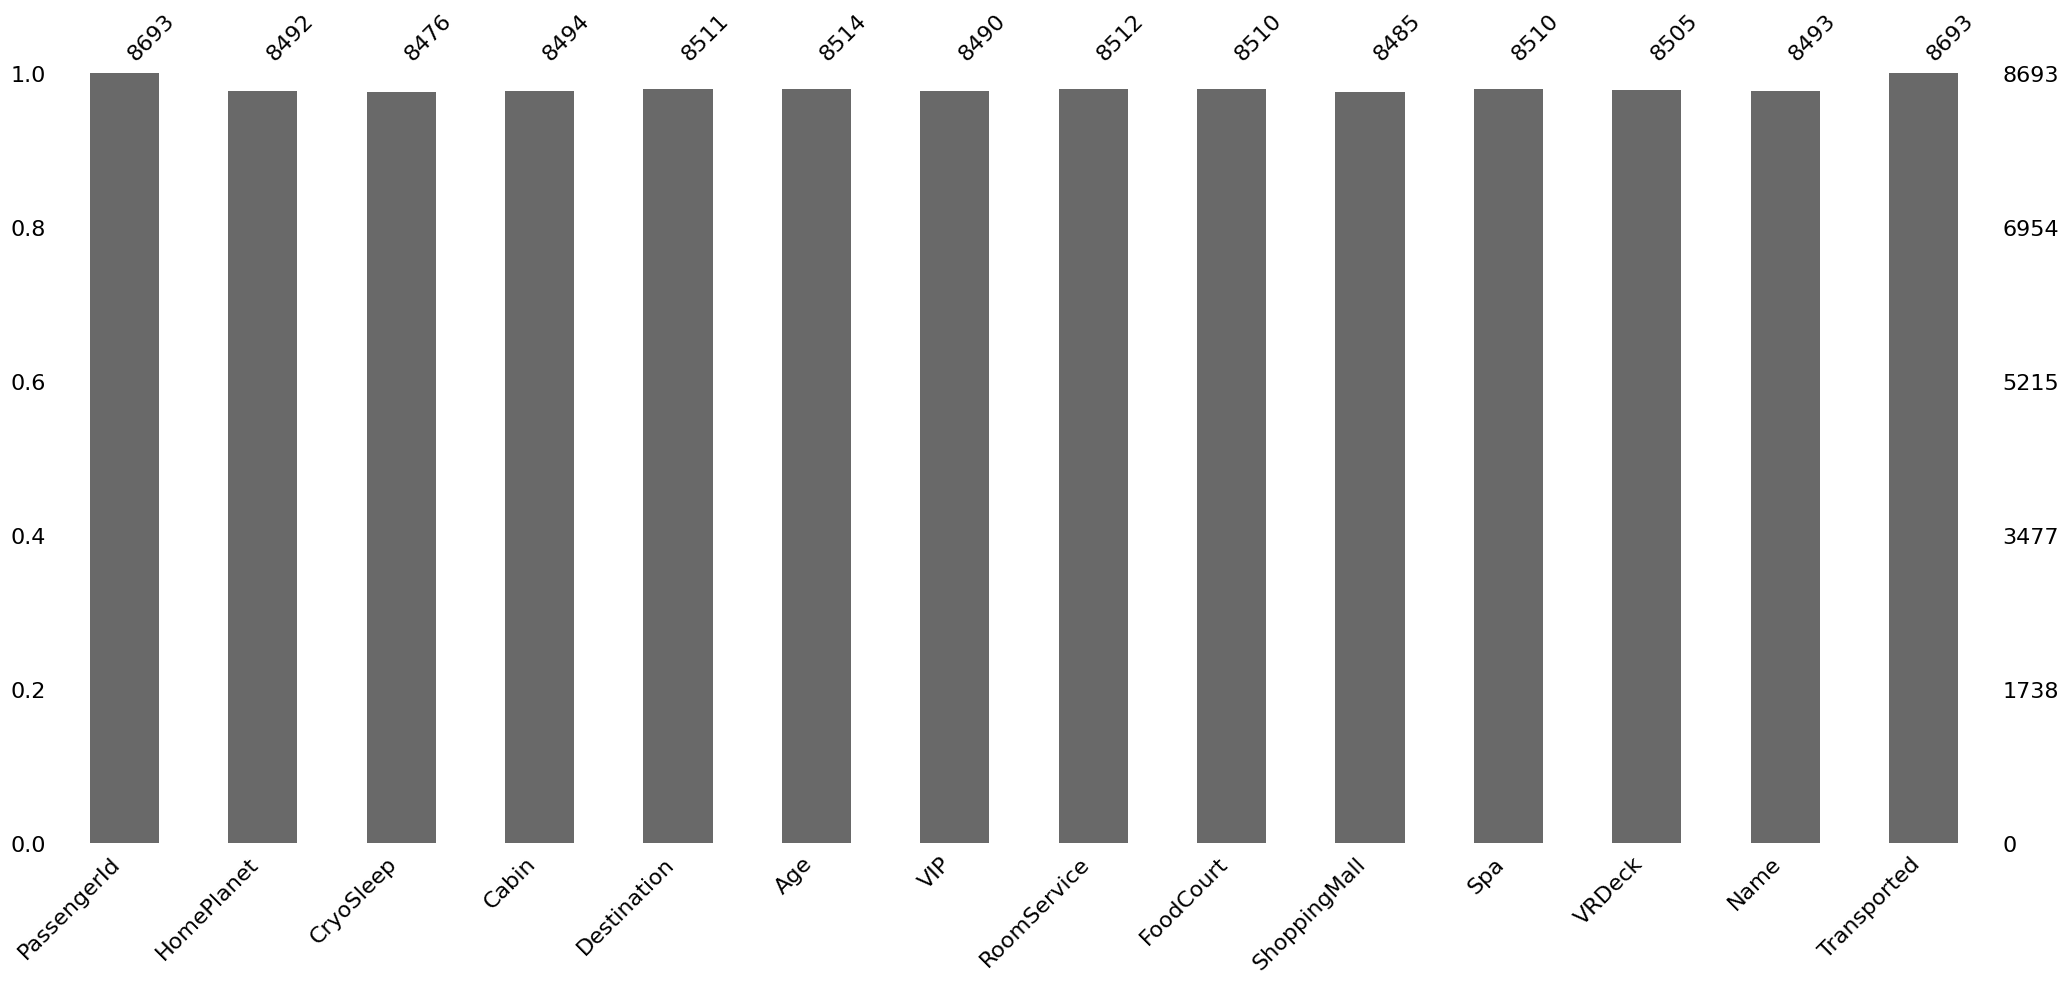

In [9]:
import missingno as msno
msno.bar(train_data);

In [10]:
train_data.isnull().sum().sum() + test_data.isnull().sum().sum()

3441

In [11]:
numeric_data = [column for column in train_data.select_dtypes(["int", "float"])]
test_numeric_data = [column for column in test_data.select_dtypes(["int", "float"])]
categoric_data = [column for column in train_data.select_dtypes(exclude=["int", "float"])]
test_categoric_data = [column for column in test_data.select_dtypes(exclude=["int", "float"])]

for col in numeric_data:
    train_data[col] = train_data[col].infer_objects(copy=False).fillna(train_data[col].median())
for col in test_numeric_data:
    test_data[col] = test_data[col].infer_objects(copy=False).fillna(test_data[col].median())

for col in categoric_data:
    train_data[col] = train_data[col].fillna(train_data[col].value_counts().index[0]).infer_objects(copy=False)
for col in test_categoric_data:
    test_data[col] = test_data[col].fillna(test_data[col].value_counts().index[0]).infer_objects(copy=False)

C:\Users\IIsovaII\AppData\Local\Temp\ipykernel_13372\1800852705.py:12: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\IIsovaII\AppData\Local\Temp\ipykernel_13372\1800852705.py:12: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\IIsovaII\AppData\Local\Temp\ipykernel_13372\1800852705.py:14: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

In [12]:
train_data.isnull().sum().sum() + test_data.isnull().sum().sum()

0

In [13]:
print("Columns in object data type: \n",
      list(train_data.select_dtypes("object").columns))

Columns in object data type: 
 ['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name']


In [14]:
print("Columns in numeric data type: \n",
      list(train_data.select_dtypes(["int", "float"]).columns))

Columns in numeric data type: 
 ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


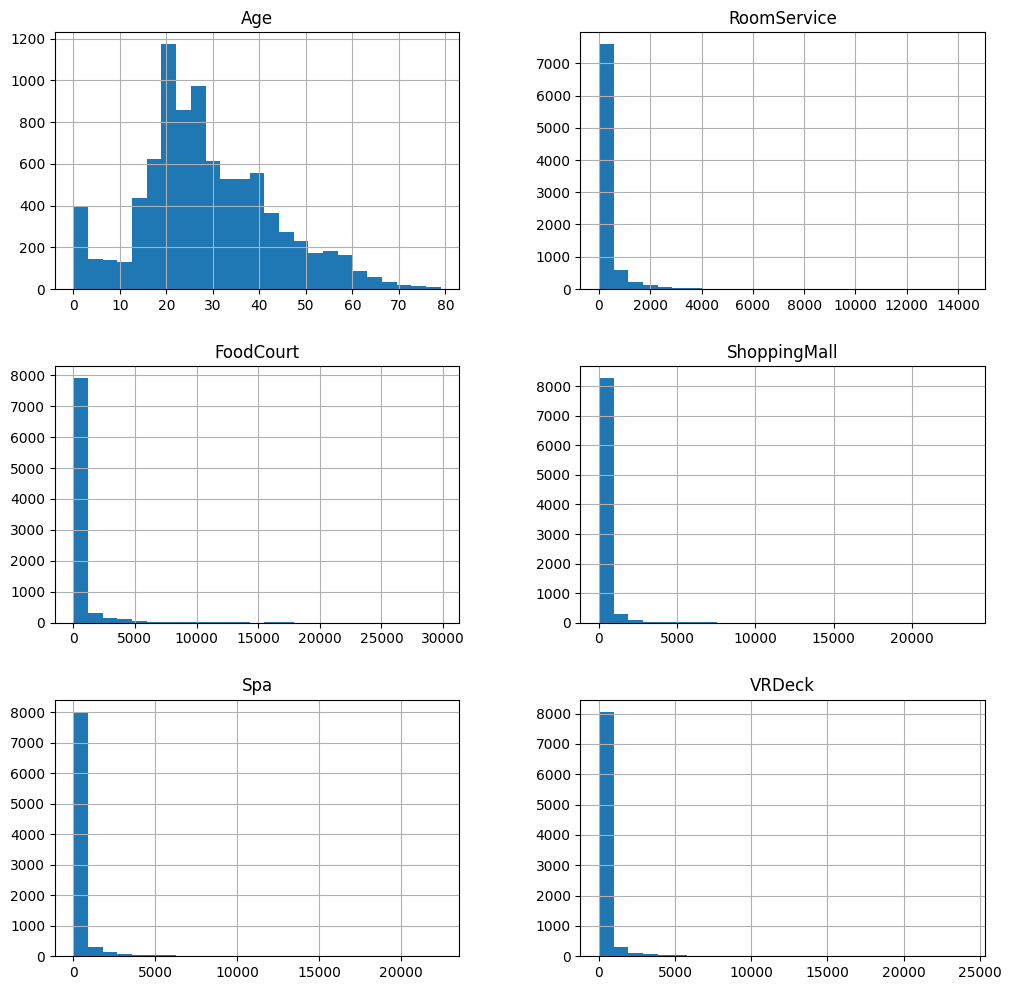

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
train_data.hist(bins = 25, figsize = (12, 12))
plt.show()

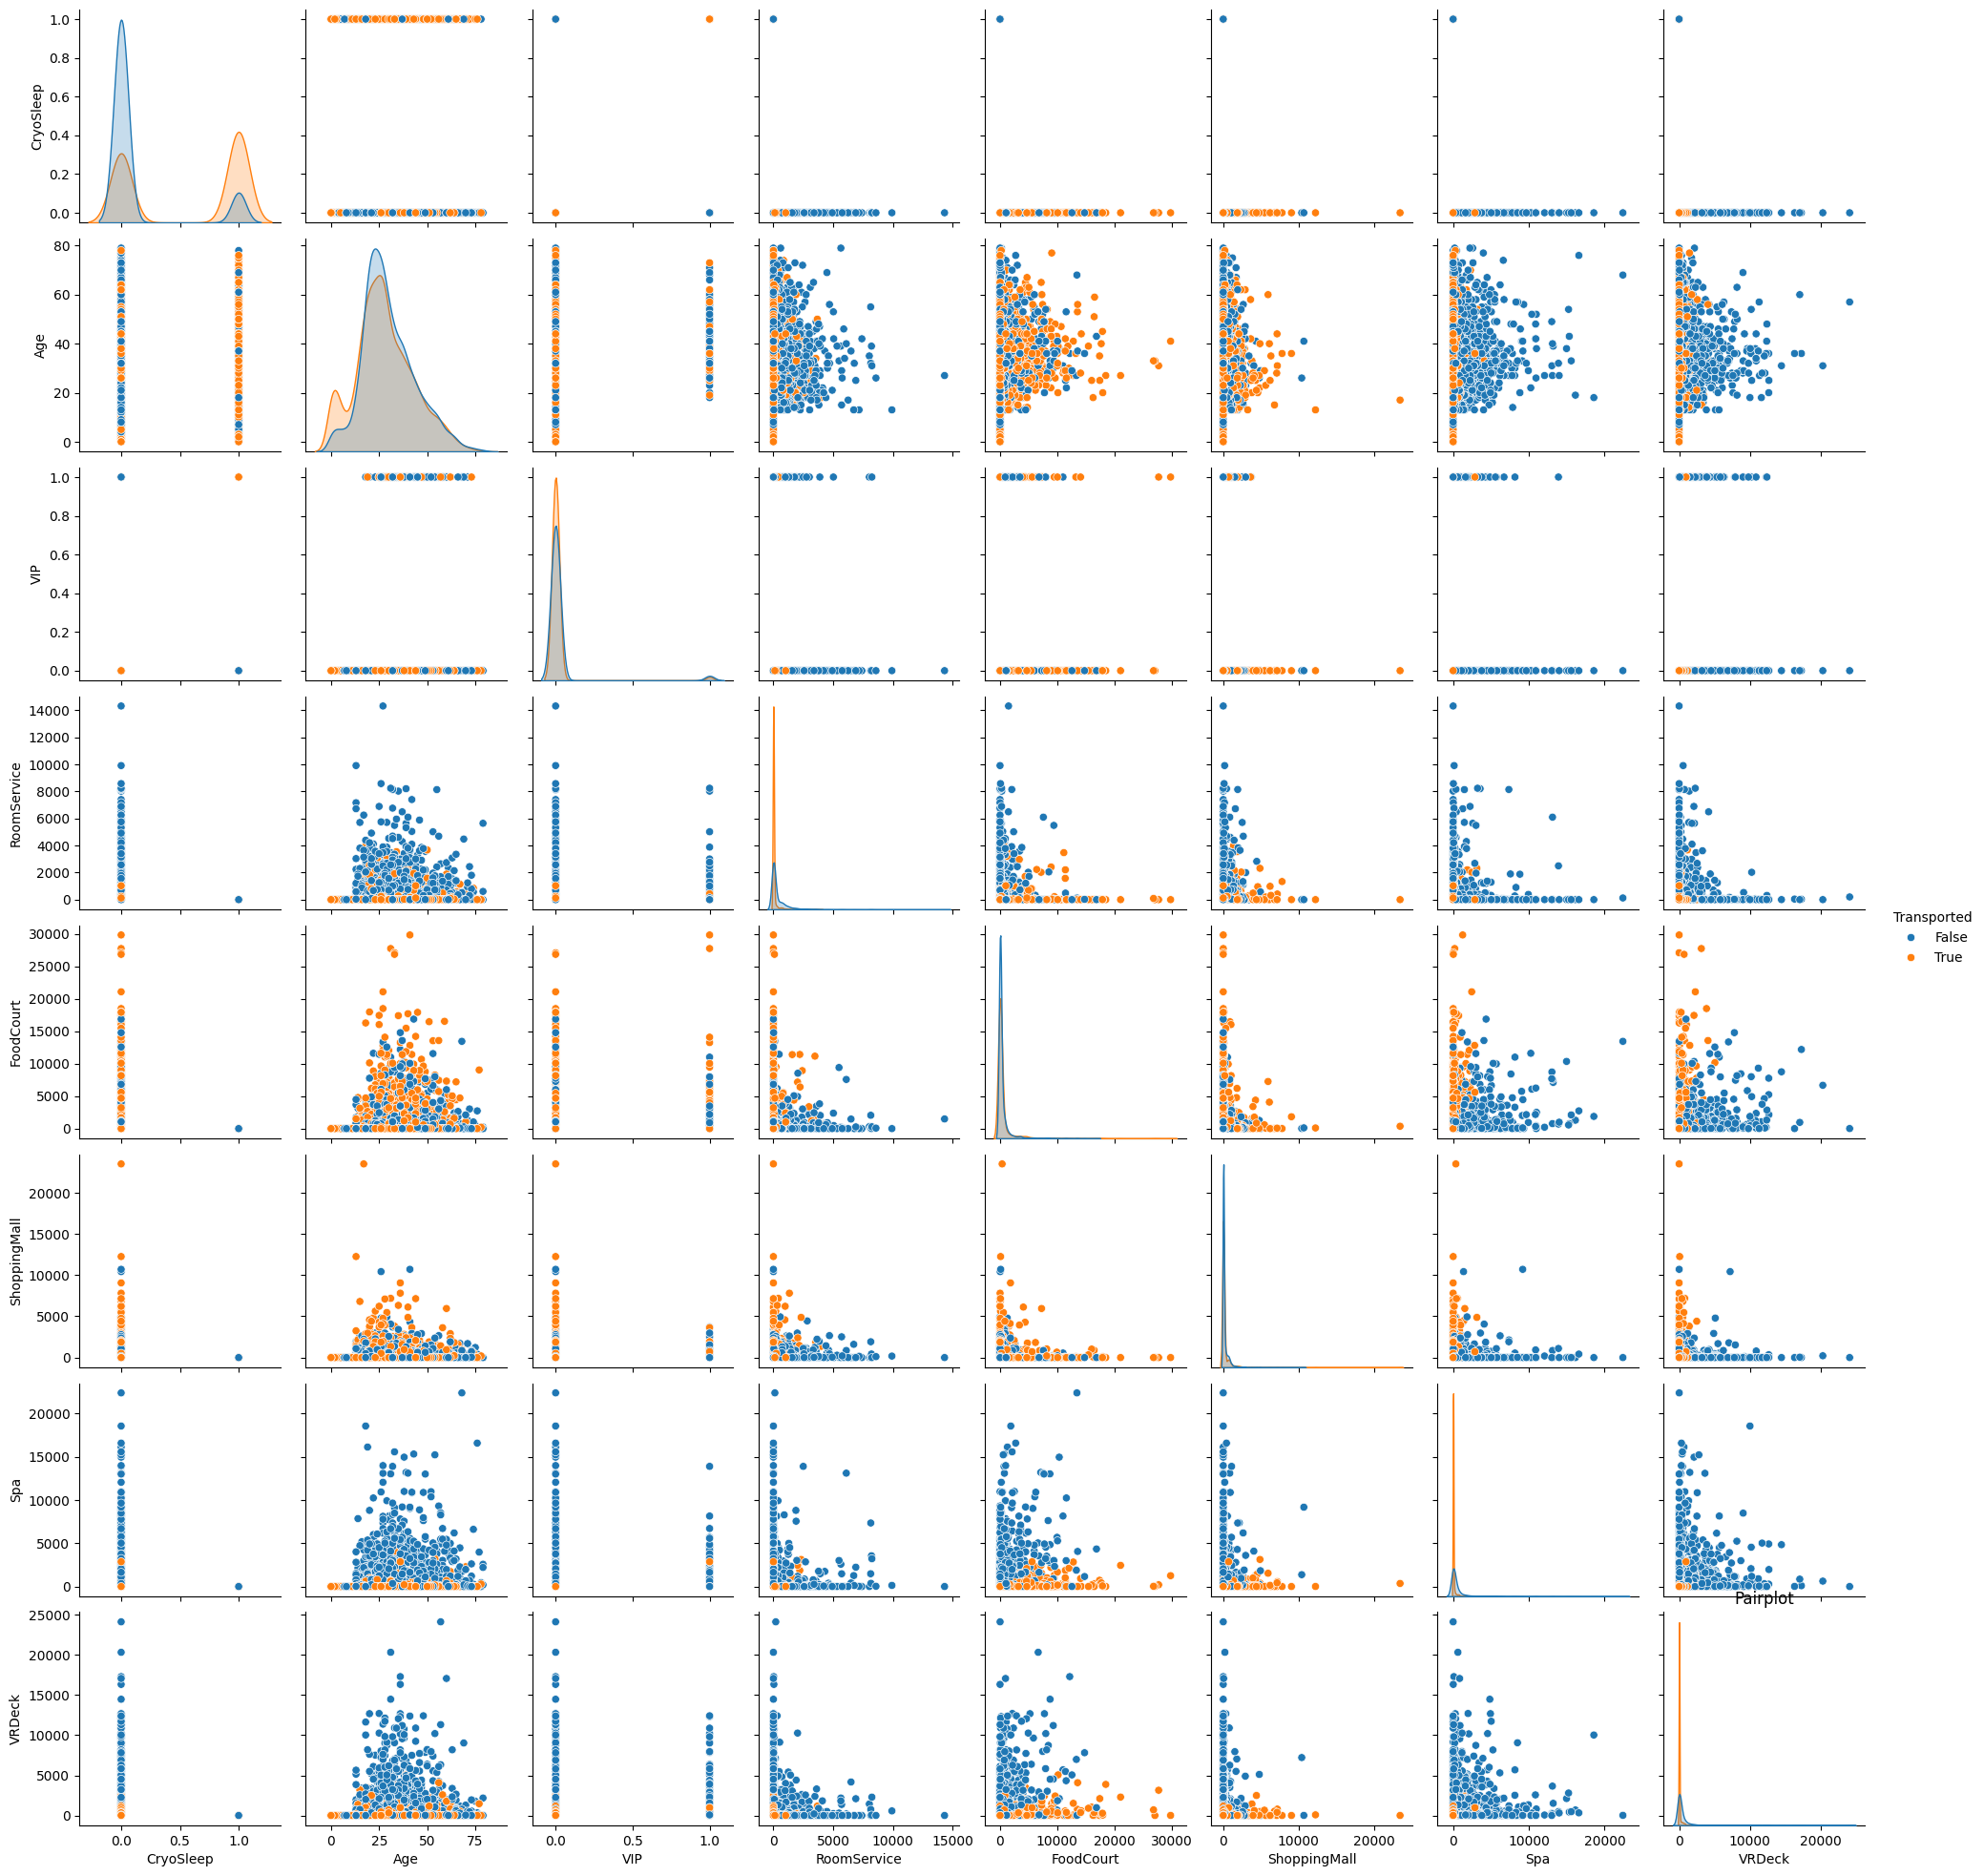

In [17]:
sns.pairplot(train_data, hue='Transported')
plt.title('Pairplot')
plt.show()

In [18]:
task.close()